## Importação de Bibliotecas

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import metrics
%matplotlib inline

## Leitura de Arquivo CSV definindo o delimitador para ";"

In [2]:
df = pd.read_csv("emprestimo.csv", sep=";")
df.head()

,montante,idade,salario,tem_conta,empresta
0,Medio,Senior,Baixo,Sim,Nao
1,Medio,Senior,Baixo,Nao,Nao
2,Baixo,Senior,Baixo,Sim,Sim
3,Alto,Media,Baixo,Sim,Sim
4,Alto,Jovem,Alto,Sim,Sim


### Mostrando as colunas do data frame

In [3]:
for col in df:
  print(col, df[col].unique())

montante ['Medio' 'Baixo' 'Alto']
idade ['Senior' 'Media' 'Jovem']
salario ['Baixo' 'Alto']
tem_conta ['Sim' 'Nao']
empresta ['Nao' 'Sim']


## Alteração do tipo dos dados para numéricos

In [4]:
translate = {
    'montante': {'Alto':2,'Baixo':0,'Medio': 1},
    'idade': {'Senior':2,'Media':1,'Jovem':0},
    'salario': {'Baixo':0,'Alto':1},
    'tem_conta': {'Sim':1,'Nao':0},
    'empresta': {'Sim': 'Sim','Nao':'Nao'},
}
for col in df:
    df[col] = df[col].apply(lambda k: translate[col][k])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   montante   14 non-null     int64 
 1   idade      14 non-null     int64 
 2   salario    14 non-null     int64 
 3   tem_conta  14 non-null     int64 
 4   empresta   14 non-null     object
dtypes: int64(4), object(1)
memory usage: 688.0+ bytes


## Treinando do Modelo

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.33, random_state=666)
train.reset_index(inplace=True)
test.reset_index(inplace=True)
f"train size: {len(train)} test size: {len(test)}"

'train size: 9 test size: 5'

In [6]:
def data_target_split(df: pd.DataFrame):
  target = df['empresta']
  data = df.loc[:, 'montante':'tem_conta']
  return data, target 
train_x, train_y = data_target_split(train)
test_x, test_y = data_target_split(test)

In [7]:
from dataclasses import dataclass
@dataclass(frozen=True)
class ModelResult:
  n: int
  clf: DecisionTreeClassifier
  acc: float

In [8]:
def tree_model(max_depth: int):
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=42) 
    
    clf.fit(train_x, train_y)

    pred_y = clf.predict(test_x)
    acc = metrics.accuracy_score(test_y, pred_y)
    return ModelResult(acc=acc, clf=clf, n=max_depth)

results = {n: tree_model(n) for n in range(1,4)}
print(*[(n, r.acc) for n, r in results.items()])

(1, 0.6) (2, 0.8) (3, 0.6)


## Apresentação dos Resultados

### Plotagem da árvore

Index(['montante', 'idade', 'salario', 'tem_conta'], dtype='object') ['Sim' 'Nao']


[Text(0.6, 0.8333333333333334, 'salario <= 0.5\nentropy = 0.764\nsamples = 9\nvalue = [2, 7]\nclass = Nao'),
 Text(0.4, 0.5, 'montante <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]\nclass = Sim'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Nao'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = Sim'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Nao')]

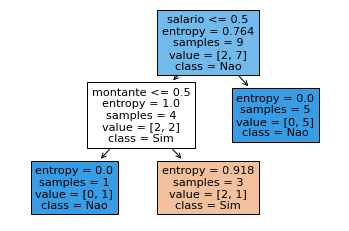

In [9]:
from sklearn import tree

clf = results[2].clf
f_names = test_x.columns
c_names = test_y.unique().astype(str)
print(f_names, c_names)
tree.plot_tree(clf, feature_names=f_names,class_names=c_names, filled=True)

### Matriz de confusão

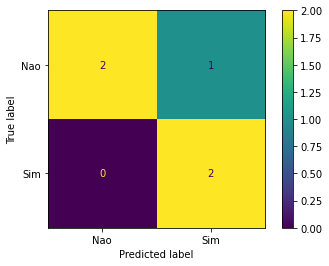

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = clf.predict(test_x);
cm = confusion_matrix(test_y, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

### Testando para uma entrada específica:

In [11]:
W_test = pd.DataFrame({'montante': [0], 'idade': [2], 'salario': [0], 'tem_conta': [1]})
y_pred = clf.predict(W_test)
y_pred

array(['Sim'], dtype=object)